5.1298987149230735 4.499809670330265 3.5553480614894135 3.8712010109078907 4.848116364598481
-1.8971199848858813 -1.3862943611198906 -0.5978370007556204 -0.16251892949777494 0.0


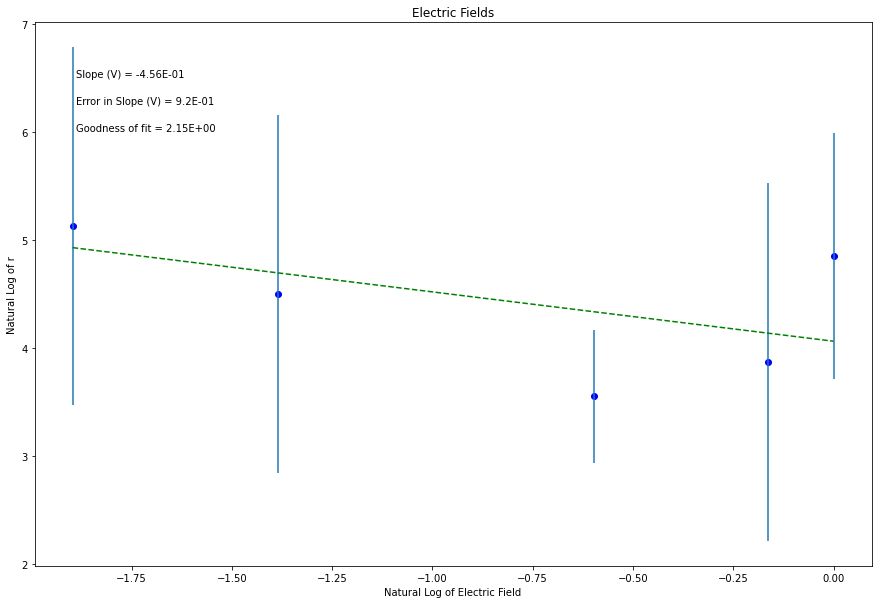

In [22]:
#Electric Fields
import math as np
import numpy as NP
import matplotlib.pyplot as plt

#dV values
dV1 = 16.9
dV2 = 9.00
dV3 = 17.5
dV4 = 4.8
dV5 = 25.5

#dr measurements
dr1 = .1
dr2 = .1
dr3 = .5
dr4 = .1
dr5 = .2

#E Calculations
E1 = dV1 / dr1
E2 = dV2 / dr2
E3 = dV3 / dr3
E4 = dV4 / dr4
E5 = dV5 / dr5

#r_mid values
r1 = 0.15
r2 = 0.25
r3 = 0.55
r4 = 0.85
r5 = 1.0

#natural log
lnE1 = np.log(E_1)
lnE2 = np.log(E_2)
lnE3 = np.log(E_3)
lnE4 = np.log(E_4)
lnE5 = np.log(E_5)
print(lnE1, lnE2, lnE3, lnE4, lnE5)

lnr1 = np.log(r1)
lnr2 = np.log(r2)
lnr3 = np.log(r3)
lnr4 = np.log(r4)
lnr5 = np.log(r5)
print(lnr1, lnr2, lnr3, lnr4, lnr5)

#Uncertainties
δV = .1
δdV = np.sqrt((.1 ** 2) + (.1 ** 2))
δr = .3
δdr = np.sqrt(((.3 ** 2) + (.3 ** 2)))
              
δE1 = E1 * np.sqrt(((δdV / dV1) ** 2) + (δdr / dr1) ** 2)
δE2 = E2 * np.sqrt(((δdV / dV2) ** 2) + (δdr / dr2) ** 2)
δE3 = E3 * np.sqrt(((δdV / dV3) ** 2) + (δdr / dr3) ** 2)
δE4 = E4 * np.sqrt(((δdV / dV4) ** 2) + (δdr / dr4) ** 2)
δE5 = E5 * np.sqrt(((δdV / dV5) ** 2) + (δdr / dr5) ** 2)
              
δlnE1 = NP.log(E1 + δE1) - NP.log(E1)
δlnE2 = NP.log(E2 + δE2) - NP.log(E2)
δlnE3 = NP.log(E3 + δE3) - NP.log(E3)
δlnE4 = NP.log(E4 + δE4) - NP.log(E4)
δlnE5 = NP.log(E5 + δE5) - NP.log(E5)

%matplotlib inline

#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
#x
lnE = NP.array([lnE1, lnE2, lnE3, lnE4, lnE5])
#y
lnr = NP.array([lnr1, lnr2, lnr3, lnr4, lnr5]) 

#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_lnE = NP.array([δlnE1, δlnE2, δlnE3, δlnE4, δlnE5])

x = lnr
y = lnE
dy = err_lnE

b, m = NP.polynomial.polynomial.polyfit(x, y, 1, w = dy)

#best fit line
fit = b + (m * x)

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D = Delta(x, dy)
 
δm = np.sqrt(1 / D * sum(1 / dy ** 2)) #error in slope
δb = np.sqrt(1 / D * sum(x ** 2 / dy ** 2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x, y, dy):
    N = sum(((y - b - m * x) / dy) ** 2)
    return N
                      
N = LLSFD2(x, y, dy)

#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize = (15, 10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Natural Log of Electric Field')
plt.ylabel('Natural Log of r')
plt.title('Electric Fields')
 
plt.errorbar(x, y, yerr = dy, xerr = None, fmt = "none") #don't need to plot x error bars
 
plt.annotate('Slope (V) = {value:.{digits}E}'.format(value = m, digits = 2),
             (0.05, 0.9), xycoords = 'axes fraction')
 
plt.annotate('Error in Slope (V) = {value:.{digits}E}'.format(value = δm, digits = 1),
             (0.05, 0.85), xycoords = 'axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value = N, digits = 2),
             (0.05, 0.80), xycoords = 'axes fraction')

plt.show()
